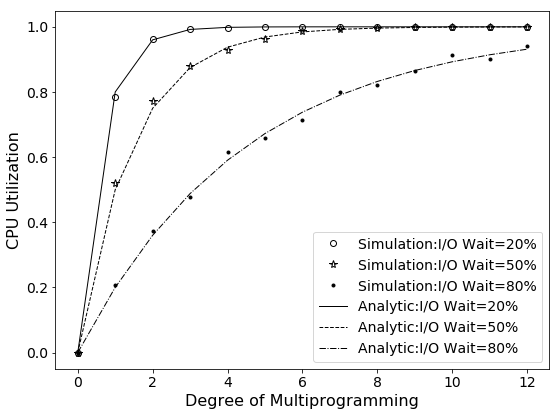

In [6]:
import numpy as np
import os

from matplotlib import pyplot as plt

def setup_font_sizes():
    SMALL_SIZE = 14
    MEDIUM_SIZE = 16
    BIG_SIZE = 20
    plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
    plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
    plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels

    plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
    plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
    plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
    plt.rc('figure', titlesize=BIG_SIZE)     # fontsize of the figure title

def save_graph(graph_fn):
    figure_dir = 'figures'
    try:
        os.makedirs(figure_dir)
    except:
        pass
    plt.savefig(os.path.join(figure_dir, graph_fn + '.pdf'))
    plt.savefig(os.path.join(figure_dir, graph_fn + '.pdf'))
    
def compute_cpu_utilization(io_waits, process_numbers):
    utilization = [];
    for w in io_waits:
        utilization.append(1 - w**process_numbers)
    return np.array(utilization)

def simulate_multiprogramming(io_wait, process_number, max_scheduling_quantums):
    busy_quantums = 0
    for _ in range(0, max_scheduling_quantums):
        is_busy = False
        for _ in range(process_number):
            rn = np.random.random_sample()
            # print(quantum, io_wait, p, rn)
            if rn >= io_wait:
                is_busy = True
                break
        if is_busy:
            busy_quantums = busy_quantums + 1
    utilization = busy_quantums / max_scheduling_quantums
    return utilization

def setup_graph():
    setup_font_sizes()
    _, ax = plt.subplots(figsize=(8, 6))
    return ax

def add_labels_and_legends(ax, legends):
    ax.legend(legends)
    ax.set_xlabel('Degree of Multiprogramming')
    ax.set_ylabel('CPU Utilization')

def showsave_graph(graph_fn):
    plt.tight_layout()
    save_graph(graph_fn)
    plt.show()

def plot_simulation_points(ax, utilization, io_waits, process_numbers):
    linestyles = ['none', 'none', 'none']
    linewidths = [1, 1, 1]
    colors = ['k', 'k', 'k']
    markers = ['o', '*', '.']
    markersizes = [6, 8, 6]
    markerfacecolors = ['none', 'none', 'k']
    legends = []
    for io_wait,row,style,color,width,marker,size,facecolor in zip(io_waits, utilization, linestyles, colors, linewidths, markers, markersizes, markerfacecolors):
        ax.plot(process_numbers, row, linestyle=style, color=color, linewidth=width, marker=marker, markersize=size, markerfacecolor=facecolor)
        legends.append('Simulation:I/O Wait={0:2d}%'.format(int(io_wait*100)))
    return legends

def plot_analytics_lines(ax, utilization, io_waits, process_numbers):
    linestyles = ['-', '--', '-.']
    linewidths = [1, 1, 1]
    colors = ['k', 'k', 'k']
    legends = []
    for io_wait,row,style,color,width in zip(io_waits, utilization, linestyles, colors, linewidths):
        ax.plot(process_numbers, row, linestyle=style, color=color, linewidth=width)
        legends.append('Analytic:I/O Wait={0:2d}%'.format(int(io_wait*100)))
    return legends

def plot_graph(utilizations_sim, utilizations_ana, io_waits, process_numbers, graph_fn):
    ax = setup_graph()
    legends_sim = plot_simulation_points(ax, utilizations_sim, io_waits, process_numbers)
    legends_ana = plot_analytics_lines(ax, utilizations_ana, io_waits, process_numbers)
    legends = legends_sim + legends_ana
    add_labels_and_legends(ax, legends)
    showsave_graph(graph_fn)


    
io_waits = np.array([0.2, 0.5, 0.8])
process_numbers = np.array(range(0, 13))
max_scheduling_quantums = 1000
utilizations_sim = []
for io_wait in io_waits:
    u_for_io_wait = []
    for process_number in process_numbers:
        u = simulate_multiprogramming(io_wait, process_number, max_scheduling_quantums)
        u_for_io_wait.append(u)
    utilizations_sim.append(np.array(u_for_io_wait))
utilizations_ana = compute_cpu_utilization(io_waits, process_numbers)
plot_graph(utilizations_sim, utilizations_ana, io_waits, process_numbers, 'multiprogrammingsim')